In [1]:
import torch
from matplotlib import pyplot as plt

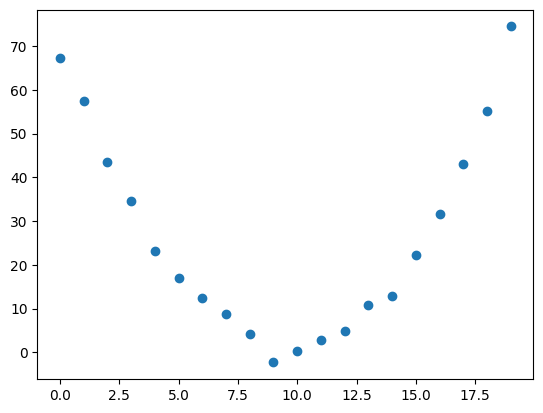

In [2]:
time = torch.arange(0,20).float(); time
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

plt.scatter(time, speed)

In [3]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [4]:
def mse(preds, targs): return ((preds-targs)**2).mean()

In [5]:
params = torch.randn(3).requires_grad_()
preds = f(time, params)

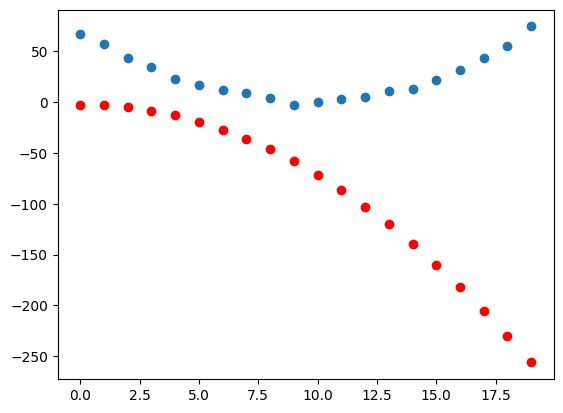

In [6]:
plt.scatter(time, preds.detach().numpy(), color='red')
plt.scatter(time, speed)

In [7]:
def step(params, p=True, lr=1e-5):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= params.grad.data * lr
    params.grad = None
    if p: print(loss.item())
    return preds

In [8]:
for i in range(10): step(params)

21042.134765625
4566.0087890625
1448.2196044921875
858.2357177734375
746.5897216796875
725.4598388671875
721.4581909179688
720.6978759765625
720.5509033203125
720.5198974609375


# REPEAT BELOW THIS
and see the red curve changing

In [9]:
loss = mse(preds, speed)
loss

tensor(21042.1348, grad_fn=<MeanBackward0>)

In [10]:
loss.backward()

In [11]:
params, params.grad * 1e-5

(tensor([ 0.1314,  0.2868, -2.5657], requires_grad=True),
 tensor([-0.4782, -0.0307, -0.0023]))

In [12]:
# update params
params.data -= params.grad.data * 1e-5
params.grad = None
params

tensor([ 0.6097,  0.3175, -2.5634], requires_grad=True)

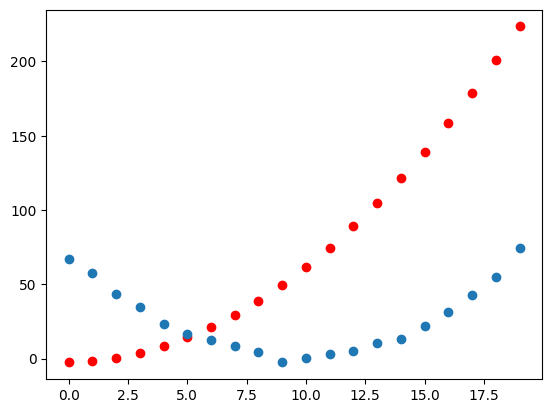

In [13]:
preds = f(time, params)
plt.scatter(time, preds.detach().numpy(), color='red')
plt.scatter(time, speed)